Extraction Complete!


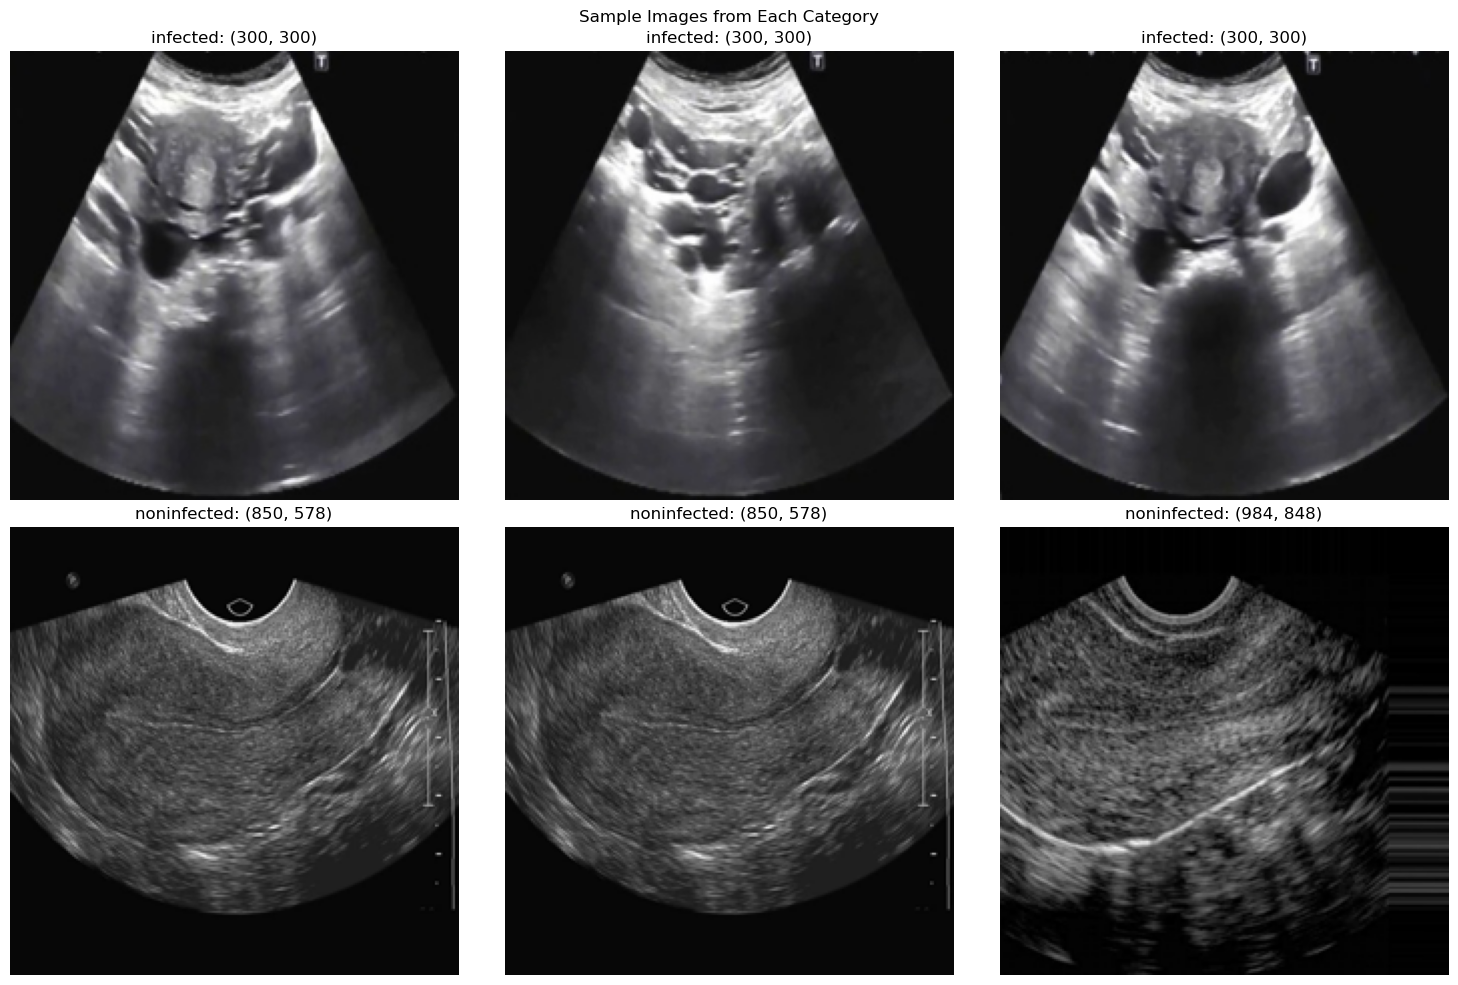

In [19]:
import zipfile

# Define the zip file path and the extraction folder
zip_path = "C:/Users/HP/Desktop/Sem4/PCOS.zip"
extract_path = "C:/Users/HP/Desktop/Sem4/PCOS/PC"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")




import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
# Set the path to your dataset
data_dir = "C:/Users/HP/Desktop/Sem4/PCOS/PCOS"

# Categories
categories = ['infected', 'noninfected']

# Setup the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Sample Images from Each Category')

for i, category in enumerate(categories):
    
    category_dir = os.path.join(data_dir, category)
    # List a few images
    sample_images = os.listdir(category_dir)[:3] 

    for j, image_file in enumerate(sample_images):
        # Load the image
        img_path = os.path.join(category_dir, image_file)
        img = Image.open(img_path)
        resized_img = img.resize((224, 224))
        img_array = np.array(resized_img)
        
        ax = axes[i, j]
        ax.imshow(resized_img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"{category}: {img.size}")
        

plt.tight_layout()
plt.show()

Extraction Complete!


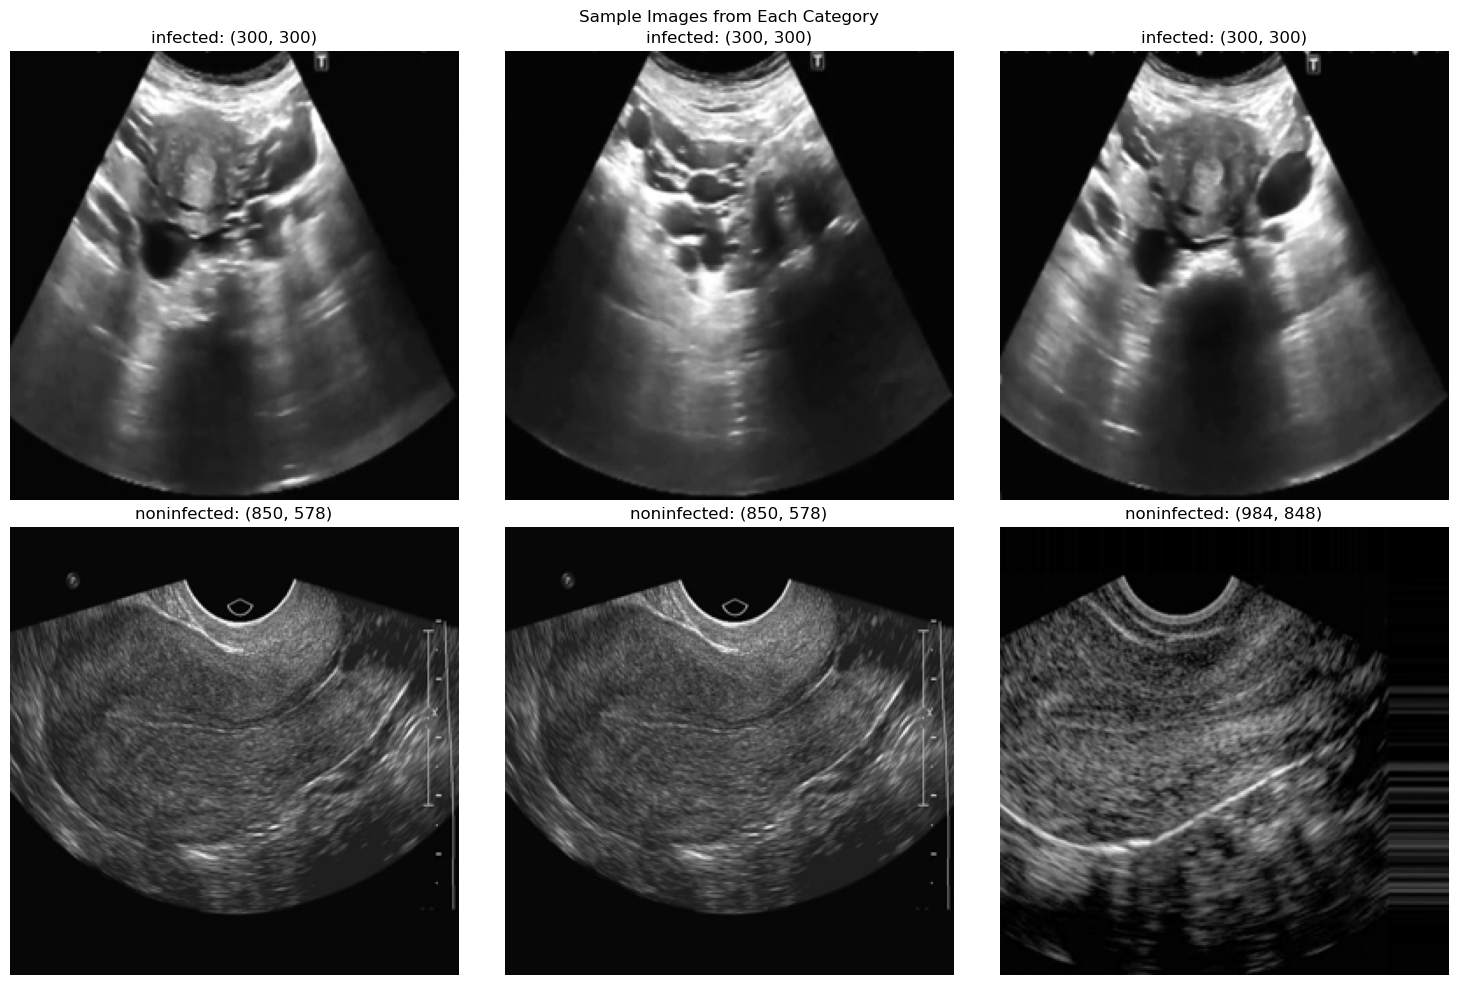

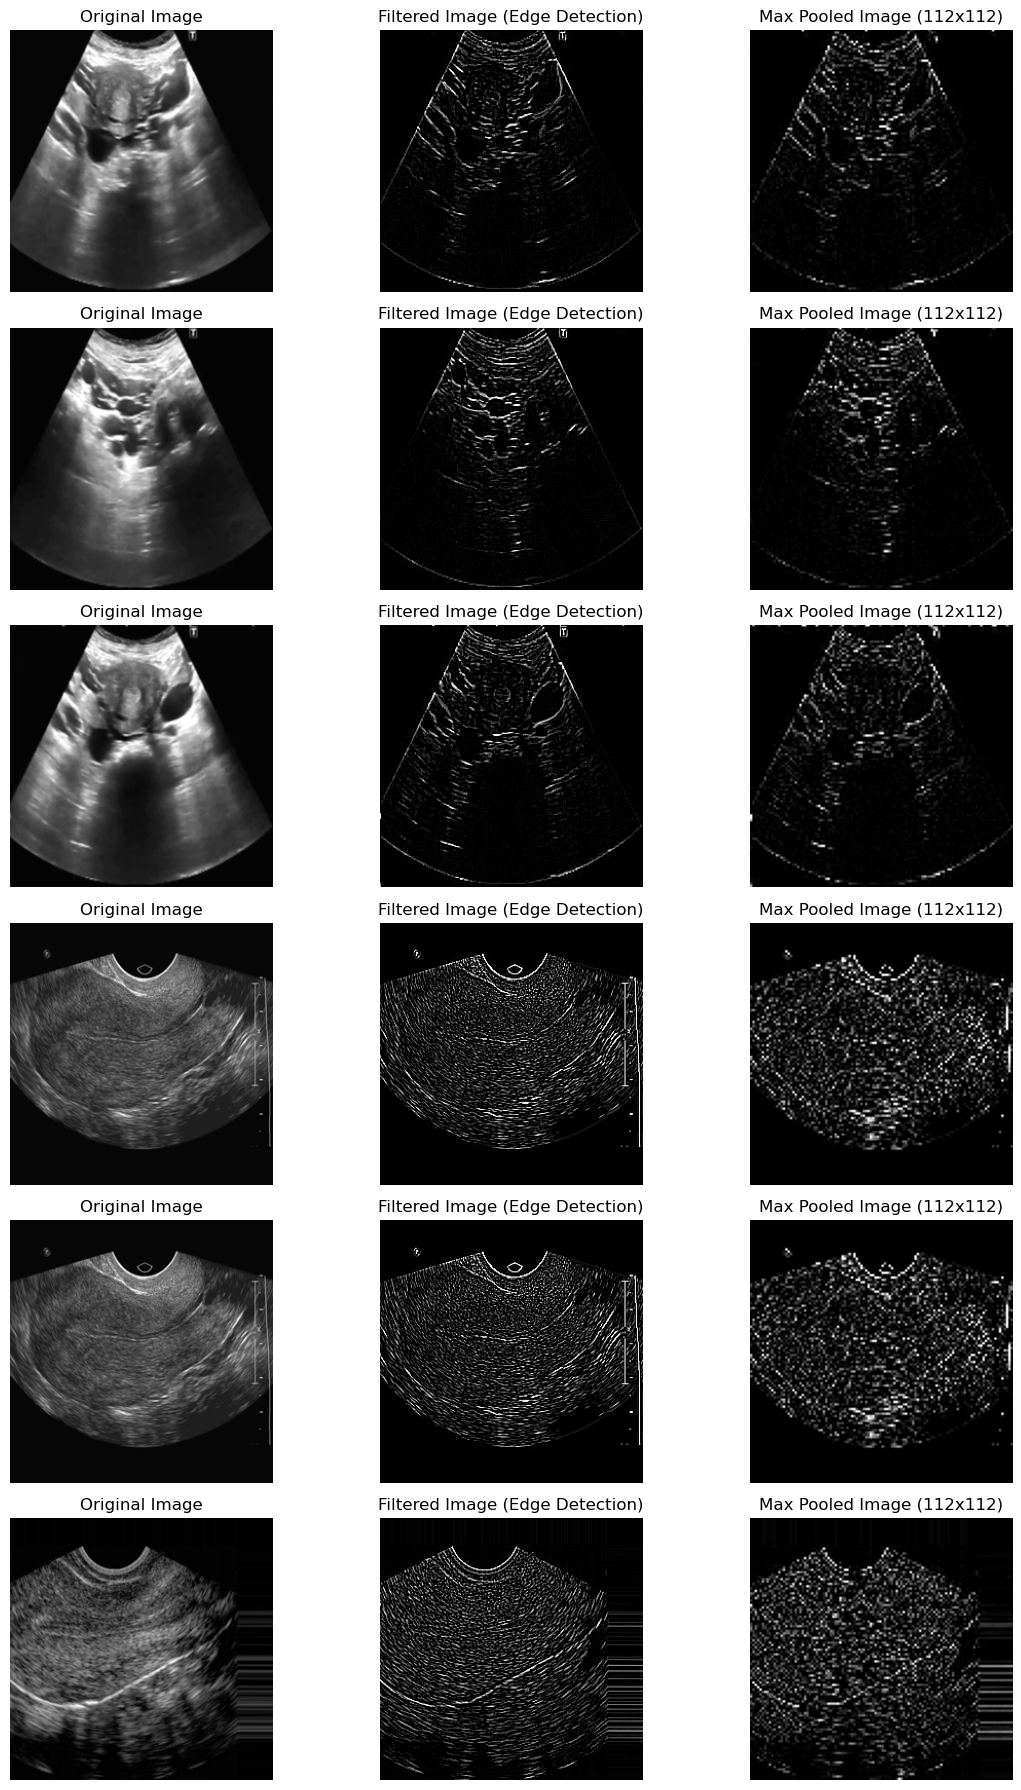

In [4]:
import zipfile

# Define the zip file path and the extraction folder
zip_path = "C:/Users/HP/Desktop/Sem4/PCOS.zip"
extract_path = "C:/Users/HP/Desktop/Sem4/PCOS/PC"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image

# Set the path to your dataset
data_dir = "C:/Users/HP/Desktop/Sem4/PCOS/PCOS"

# Categories
categories = ['infected', 'noninfected']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Sample Images from Each Category')

# Store selected images for further processing
selected_images = []

for i, category in enumerate(categories):
    # Get the directory for each category
    category_dir = os.path.join(data_dir, category)
    # List a few images
    sample_images = os.listdir(category_dir)[:3]

    for j, image_file in enumerate(sample_images):
        # Load the image
        img_path = os.path.join(category_dir, image_file)
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        resized_img = img.resize((256, 256))
        img_array = np.array(resized_img)

        # Store for later processing
        selected_images.append(img_array)

        # Display the image
        ax = axes[i, j]
        ax.imshow(resized_img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"{category}: {img.size}")

plt.tight_layout()
plt.show()

# Define a Kernel (Edge Detection)
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

# Setup figure for edge detection and pooling results
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))

for i, img_array in enumerate(selected_images):
    # Apply Convolution using OpenCV (Edge Detection)
    filtered_image = cv2.filter2D(img_array, -1, kernel)

    # Apply Max Pooling (Dimensionality Reduction)
    pooled_image = cv2.resize(filtered_image, (112, 112), interpolation=cv2.INTER_NEAREST)

    # Plot the original, filtered, and pooled images
    axes[i, 0].imshow(img_array, cmap='gray')
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(filtered_image, cmap='gray')
    axes[i, 1].set_title("Filtered Image (Edge Detection)")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(pooled_image, cmap='gray')
    axes[i, 2].set_title("Max Pooled Image (112x112)")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


In [22]:
import os


data_dir = "C:/Users/HP/Desktop/Sem4/PCOS/PCOS"
categories = ['infected', 'noninfected']


for category in categories:
    category_dir = os.path.join(data_dir, category)
    if os.path.exists(category_dir):
        num_files = len(os.listdir(category_dir))
        print(f"Category: {category}, Number of images: {num_files}")
    else:
        print(f"Warning: Category folder '{category}' is missing!")


Category: infected, Number of images: 6784
Category: noninfected, Number of images: 5000


In [24]:
from PIL import Image

# Check for corrupted images
for category in categories:
    category_dir = os.path.join(data_dir, category)
    for image_file in os.listdir(category_dir):
        img_path = os.path.join(category_dir, image_file)
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verify if the image can be opened
                print("no corrupted image")
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image found: {img_path}")


no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted image
no corrupted

In [27]:
import numpy as np
import cv2

# Check for blank or black images
for category in categories:
    category_dir = os.path.join(data_dir, category)
    for image_file in os.listdir(category_dir):
        img_path = os.path.join(category_dir, image_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        if img is None:
            print(f"Unreadable image: {img_path}")
            continue
        
        #
        mean_pixel_value = np.mean(img)
        
        
        if mean_pixel_value < 5:  
            print(f"Blank/Black image found: {img_path}, Mean pixel value: {mean_pixel_value}")
        else:
            print("no blank image found")


no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank image found
no blank imag

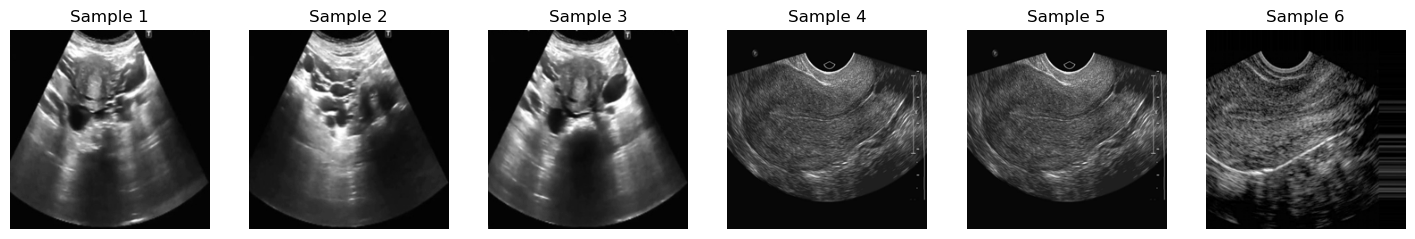

In [28]:
fig, axes = plt.subplots(1, 6, figsize=(18, 6))
for i, img in enumerate(selected_images[:6]):
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Sample {i+1}")
plt.show()


In [34]:
img_array = np.array(resized_img, dtype=np.float32) / 255.0  # Convert to float32 before dividing



    
selected_images.append(img_array)
import matplotlib.pyplot as plt  

# Setup figure for displaying images  
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Normalized Sample Images')

for i, img_array in enumerate(selected_images[:6]):  # Show only first 6 images
    ax = axes[i // 3, i % 3]  # Arrange in a 2x3 grid
    ax.imshow(img_array, cmap='gray')  
    ax.axis('off')  
    ax.set_title(f"Image {i+1} (Normalized)")

plt.tight_layout()
plt.show()

